# 手書き数字認識問題を解く
- 使用するデータはMNIST。
    - 60,000枚の手書き数字の画像データと、各画像の数字ラベルが入っている。
- シンプルなニューラルネットを使って、手書き数字認識をする。
    - [入力] 手書き数字の画像データ
    - [出力] 数字ラベル
- ニューラルネットには隠れ層を入れない。
    - 画像を__x__、ラベルを__y__とすれば、__x__→__y__

# データ読み込み

- `numpy`は配列演算をするpythonライブラリ。
    - 裏でBLASとLAPACKが動いている。
    - numpyのソースはC言語で書かれている（だから速い）。
- `import`はライブラリを読み込む文。
    - `as`に続く文字はショートカット。
    - `numpy`と打ち込むのが面倒＆ソースコードが長くなるので、短く`np`と命名する。

In [1]:
import numpy as np

- https://s3.amazonaws.com/img-datasets/mnist.npz  
にアクセスして`mnist.npz`をダウンロードし、同じディレクトリに入れておく。
- `numpy`には`npz`形式のデータを読み込む`load`というメソッドがある。
    - `npz`は`numpy`配列を保存するときのデータ形式の一種。
    - メソッドとはクラスの中で定義された関数。
    - `numpy`という名前の物体の中に`load`という名前の関数が格納されている、くらいの認識でOK。
- `mnist.npz`というファイルを読み込んだ結果を`f`に格納する。

In [2]:
f = np.load('mnist.npz')

- `f`にどんなデータが入っているかを調べるには`f.keys()`と打てば良い。
- `f.keys()`の最後の丸括弧()は必須。`f.keys()`だと`f`の中に入っている`keys`という__関数__を呼び出せるが、`f.keys`と書いてしまうと`f`の中に入っている`keys`という名前の__変数__を呼び出そうとしてしまう。

In [3]:
f.keys()

['x_test', 'x_train', 'y_train', 'y_test']

- `f`からデータを取り出す。
    - `x_train`: 訓練に使う数字画像
    - `y_train`: 訓練に使う数字ラベル
    - `x_test`: テストに使う数字画像
    - `y_test`: テストに使う数字ラベル
    - 訓練用のデータを使ってニューラルネットを最適化する。
    - 訓練が終わった後、ニューラルネットは次のどちらかの状態になっている。
        1. 数字とはどんな特徴を持っているかを把握して、画像から数字を認識できる
        2. 訓練データを丸暗記しているだけで、認識はできていない
    - 2.の状態になっていても使い物にならないので、テストデータ（見たことのない画像データ）をニューラルネットに入力して、ちゃんと数字ラベルを当てられるかどうかを確認する。
- `f`からデータを取り出すときは、角括弧`[]`の中に`f.keys()`で確認した文字列を入れる。文字列は必ずシングルクォートまたはダブルクォートで囲む(`'文字列'`または`"文字列"`)。

In [4]:
x_train = f['x_train']
y_train = f['y_train']
x_test = f['x_test']
y_test = f['y_test']

# 読み込んだデータの確認

- 変数をベタがきすると、その中身が表示される

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

- `numpy配列.shape`で配列の大きさが表示できる

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

- `matplotlib`を使って画像を表示する。
    - `matplotlib`はpythonのグラフ描画ライブラリ。
    - `matplotlib`というライブラリの中に`pyplot`というクラスがある。これを使いたい場合は、`import`するときに`matplotlib.pyplot`とする。
    - 毎回`matplotlib.pyplot`と打つのが面倒なので、これは`plt`という名前にしておく。
    - Jupyter Notebookの中で`matplotlib`の図を表示するために、`%matplotlib inline`を書いておく。
- `pyplot`の中に`imshow`という名前の関数がある。これは2次元配列を受け取って画像を表示する関数。
    - 下の例では全部で60,000枚ある画像のうち、１番目（インデックスは0）の画像を表示している。

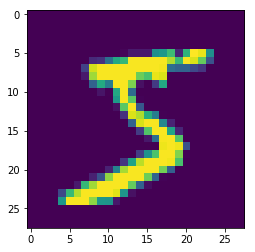

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0])

- `pyplot`の中にある`title`という関数を使うと、画像の上部に文字を表示できる。
- `title`には文字列を入力しないといけないので、`str`という組み込み関数を使って`numpy`配列を文字列に変換している。

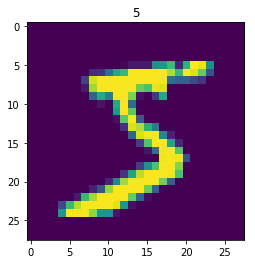

In [10]:
plt.imshow(x_train[0])
plt.title(str(y_train[0]))

# ニューラルネット用にデータを変換

- 今回使うニューラルネットは入力が1次元配列なので、入力配列（画像）の形を変更する。
- 配列の形の変更は、`numpy`の`reshape`という関数を使う。
    - `reshape`は第１引数に変更したい配列、第２引数に変更後の配列の形を渡す。
    - 配列の形は丸括弧で表す。
    - 配列の形を変更したものは大文字の変数で格納しておく。  
        `x_train`→`X_TRAIN`  
        `x_test`→`X_TEST`
- 変更前後の配列の形を表示する。
    - `print`を使っても表示できる。
    - 丸括弧の中に表示したい変数を書く。
- ニューラルネットの入力は[0, 1]や[-1,1]の範囲にしておくと良いので、255で割っておく。

In [11]:
X_TRAIN = np.reshape(x_train, (60000, 784)) / 255.
X_TEST = np.reshape(x_test, (10000, 784)) / 255.

In [12]:
print(x_train.shape, X_TRAIN.shape)

(60000, 28, 28) (60000, 784)


In [13]:
print(x_test.shape, X_TEST.shape)

(10000, 28, 28) (10000, 784)


- [0,1]の範囲になっていることを確認する。
- `numpy`配列は、配列自身が`min`や`max`といった関数を持っている。これで配列の最小値と最大値を調べる。

In [14]:
print(x_train.min(), x_train.max())

0 255


In [15]:
print(X_TRAIN.min(), X_TRAIN.max())

0.0 1.0


- 数字ラベルを当てる場合、答えのデータはone-hotベクトルにしておく。
    - 5 → [0 0 0 0 0 1 0 0 0 0]
    - 3 → [0 0 0 1 0 0 0 0 0 0]
- one-hotベクトルに変換する方法は色々あるが、とりあえず下のように書けばOK。
- one-hotベクトルにしたものは大文字の変数で格納しておく。  
    `y_train`→`Y_TRAIN`  
    `y_test`→`Y_TEST`

In [16]:
Y_TRAIN = np.eye(10)[y_train]
Y_TEST = np.eye(10)[y_test]

In [17]:
print(y_train[0])
print(Y_TRAIN[0])

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


# Kerasを使ってニューラルネットを組む

- Kerasでニューラルネットを組む場合、まずは入り口となる`Input`レイヤーを定義する。
- 下の例では`Input`レイヤーの次に全結合レイヤー（要するに普通のニューラルネット）`Dense`を繋げている。
- 分類問題の場合、出力の直前に`softmax`関数をかける。
- 入力は28✖️28の画像を一本の長いベクトルにしたものなので、28✖️28=784次元。
- `shape=784`とするとエラーが出る。
    - `shape`にはタプルというデータ形式を渡さなければならない。
    - スカラー量をタプルで表現する場合は、丸括弧とカンマを使って  
    `(スカラー,)`  
    とする。
- 0~9の計10個のクラスに分類するので、出力は10次元。

In [18]:
from keras.layers import Input, Dense

x = Input(shape=(784,))
y = Dense(10, activation='softmax')(x)

Using TensorFlow backend.


In [19]:
from keras.models import Model

neuralnet = Model(inputs=x, outputs=y)

- 構築したニューラルネットの詳細を表示する。
    - Layer (type): レイヤーの種類。
    - Output Shape: レイヤーを通り抜けた後のマトリクスのshape
    - Param #: パラメータの数

In [20]:
neuralnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


- 損失関数と最適化手法を決める。
- 分類問題なら損失関数は`categorical_crossentropy`でOK。
- 最適化手法はとりあえず`adam`にしておけばたいていの場合問題ない。
- `metrics`のところに`acc`を指定すると、訓練中の分類精度の変遷が記録できる。
    - `metrics`はリスト形式で複数の値を渡すことができるようになっている。1つしか与えない場合でもリストにする（[　]で囲む）。

In [21]:
neuralnet.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc'],
)

# 訓練

- `fit`メソッドを使って訓練する。  
    x: 入力  
    y: 教師データ  
    epochs: 訓練回数  
    validation_split: 訓練データのうち、どの程度の割合をvalidationデータにするか
- validationデータはパラメータ更新には使わない。オーバーフィットの検知のために使う。

In [22]:
hist = neuralnet.fit(
    x = X_TRAIN,
    y = Y_TRAIN,
    epochs=30,
    validation_split=0.1,
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s - loss: 0.4949 - acc: 0.8709 - val_loss: 0.2705 - val_acc: 0.9282
Epoch 2/30
54000/54000 [==============================] - 2s - loss: 0.3140 - acc: 0.9129 - val_loss: 0.2428 - val_acc: 0.9365
Epoch 3/30
54000/54000 [==============================] - 2s - loss: 0.2917 - acc: 0.9189 - val_loss: 0.2336 - val_acc: 0.9367
Epoch 4/30
54000/54000 [==============================] - 2s - loss: 0.2803 - acc: 0.9216 - val_loss: 0.2306 - val_acc: 0.9380
Epoch 5/30
54000/54000 [==============================] - 2s - loss: 0.2733 - acc: 0.9234 - val_loss: 0.2278 - val_acc: 0.9375
Epoch 6/30
54000/54000 [==============================] - 2s - loss: 0.2682 - acc: 0.9246 - val_loss: 0.2259 - val_acc: 0.9393
Epoch 7/30
54000/54000 [==============================] - 2s - loss: 0.2641 - acc: 0.9257 - val_loss: 0.2245 - val_acc: 0.9402
Epoch 8/30
54000/54000 [==============================] - 2s -

# 訓練結果の確認

- ロスの変遷

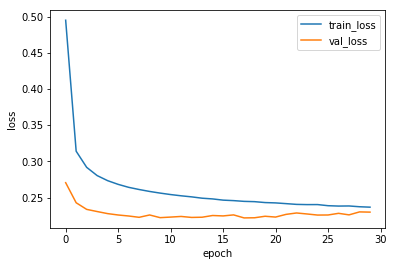

In [23]:
plt.plot(hist.epoch, hist.history['loss'], label='train_loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

- 分類精度の変遷

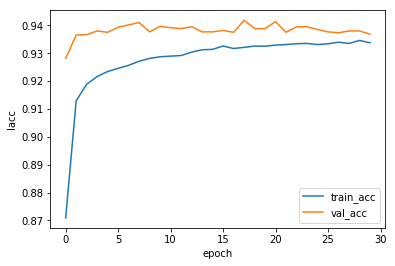

In [24]:
plt.plot(hist.epoch, hist.history['acc'], label='train_acc')
plt.plot(hist.epoch, hist.history['val_acc'], label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('lacc')

- 訓練後のニューラルネットにテストデータを入れて予測する。
- `Model`クラスの`evaluate`メソッドを使う。
    - 返り値は[損失, 分類精度]のリスト。

In [25]:
neuralnet.evaluate(x=X_TEST, y=Y_TEST)

 8224/10000 [=======================>......] - ETA: 0s

[0.27341871379017829, 0.92769999999999997]

- テストデータを訓練済みニューラルネットに入れた時の予測値を取り出す
- 10次元ベクトルになっているので、もっとも値の大きな次元だけを`argmax`を使って取り出す
    - `axis=1`を指定しないと、全データ＆全次元の中で最大の値を持っているインデックスが返ってきてしまう。

In [26]:
pred = neuralnet.predict(X_TEST).argmax(axis=1)
print(pred)

[7 2 1 ..., 4 5 6]


- 入力画像と予測ラベルを同時に表示して予測の正しさを確認する。

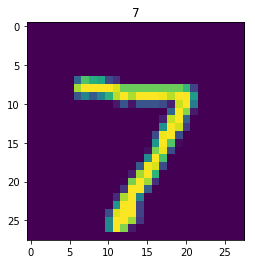

In [27]:
plt.imshow(x_test[0])
plt.title(str(pred[0]))